<img src="https://github.com/nicholasmetherall/digital-earth-pacific-macblue-activities/blob/main/attachments/images/DE_Pacific_banner.JPG?raw=true" width="900"/>

Figure 1.1.a. Jupyter environment + Python notebooks

# Digital Earth Pacific Notebook 1 prepare postcard and load data to csv

The objective of this notebook is to prepare a geomad postcard for your AOI (masking, scaling and loading additional band ratios and spectral indices) and sampling all the datasets into a csv based on your training data geodataframe.

## Step 1.1: Configure the environment

In [1]:
from datetime import datetime
import geopandas as gpd
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
# Predefined variable for title and version

# Enter your initials
initials = "nm"

# site
site = "tongatapu"

# Date
date = datetime.now()

# Make a clean version string
version = f"{initials}-{site}-{date.strftime('%d%m%Y')}"
print(version)

nm-tongatapu-11122025


### Postcard csv

The objective of this notebook was to train the machine learning model that will allow us to classify an area with land cover classes defined through the training data.

Step 1.2. Input the training data to sample geomad data from the postcard

In [3]:
# joined_df = gpd.read_file(f"training-data/{version}-training.csv")
# joined_df = joined_df.astype("float32")
# joined_df
joined_df = gpd.read_file("training-data/nm-tongatapu-11122025_postcard_4-training.csv")

In [4]:
joined_df

,LULC_code,nir,red,blue,green,emad,smad,bcmad,nir08,nir09,...,nbi,ndmi,bsi,awei,tc_wetness,y,x,dem,vh,vv
0,4,0.307,0.1063,0.0852,0.11470000000000001,0.07990727,1.3296604e-07,4.5650013e-06,0.3332,0.3604,...,-0.125985695947185,0.125985695947185,-0.1624184943687018,-0.401925,-0.06630840999999996,-2393675.0,3876145.0,3.1348777,0,0
1,2,0.34190000000000004,0.08420000000000001,0.06330000000000001,0.0989,0.15601552,6.5507294e-07,9.853097e-06,0.3326,0.3506,...,-0.2345188662213396,0.2345188662213396,-0.320514909564934,-0.48922500000000013,-0.04738885999999999,-2404505.0,3875165.0,27.563124,0,0
2,2,0.21050000000000002,0.07100000000000001,0.0717,0.08410000000000001,0.17074585,1.6380071e-06,1.1550514e-05,0.2695,0.3155,...,-0.05302651325662837,0.05302651325662837,-0.2166415175684414,-0.2900750000000001,-0.031707230000000024,-2404585.0,3875195.0,26.121586,0,0
3,2,0.3322,0.1085,0.0794,0.1169,0.13343513,6.2340496e-07,8.235353e-06,0.3098,0.1713,...,-0.11532650663085443,0.11532650663085443,-0.19895135450043686,-0.480275,-0.06727306,-2404405.0,3875085.0,29.110172,0,0
4,2,0.2817,0.1015,0.07490000000000001,0.10160000000000001,0.1305178,6.9586036e-07,8.470897e-06,0.27290000000000003,0.2862,...,-0.06201696512723843,0.06201696512723843,-0.14995162850693328,-0.4263249999999999,-0.07217224,-2404345.0,3875065.0,29.102854,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,4,0.2348,0.2107,0.1506,0.18910000000000002,0.047303498,8.1950425e-08,2.7149151e-06,0.2388,0.25630000000000003,...,0.1427528294998174,-0.1427528294998174,0.1489455669647786,-0.12095,-0.05396919000000003,-2392605.0,3873985.0,4.704696,0,0
878,4,0.3164,0.2806,0.2096,0.24730000000000002,0.07955737,5.7399273e-08,3.3720999e-06,0.36150000000000004,0.2947,...,0.0998577524893314,-0.0998577524893314,0.08625032571875267,-0.1404749999999999,-0.002636689999999983,-2392785.0,3874015.0,3.6184087,0,0
879,4,0.2451,0.218,0.1563,0.1883,0.046965223,1.19036436e-07,2.5377847e-06,0.2389,0.2742,...,0.10269082921471721,-0.10269082921471721,0.11906068254142438,-0.119425,-0.0379753,-2392715.0,3873725.0,8.095431,0,0
880,4,0.33330000000000004,0.27490000000000003,0.1864,0.2248,0.14836566,7.6683756e-07,5.660991e-06,0.3386,0.3295,...,0.0714584203928123,-0.0714584203928123,0.09420479302832242,-0.2402249999999998,-0.03062745999999999,-2392255.0,3873875.0,3.9179213,0,0


In [5]:
joined_df=joined_df.drop(columns=["y", "x"])

In [6]:
print(len(joined_df.columns))
joined_df.columns

36


Index(['LULC_code', 'nir', 'red', 'blue', 'green', 'emad', 'smad', 'bcmad',
       'nir08', 'nir09', 'swir16', 'swir22', 'coastal', 'rededge1', 'rededge2',
       'rededge3', 'mndwi', 'ndti', 'cai', 'ndvi', 'evi', 'savi', 'ndwi',
       'b_g', 'b_r', 'swir22_swir16', 'mci', 'ndci', 'nbi', 'ndmi', 'bsi',
       'awei', 'tc_wetness', 'dem', 'vh', 'vv'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

training_data, test_data = train_test_split(joined_df, test_size=0.2, random_state=1337)

# The classes are the first column
classes = np.array(training_data)[:, 0]

# The observation data is everything after the second column
observations = np.array(training_data)[:, 1:]

# Create a model...
classifier = RandomForestClassifier(max_depth=4)

# ...and fit it to the data
model = classifier.fit(observations, classes)

In [8]:
# Dynamically create the filename with f-string
file_path = f"models/{version}-test.model"

# Save the model
joblib.dump(model, file_path)

['models/nm-tongatapu-11122025-test.model']

In [9]:
import pandas as pd
test_actual = np.array(test_data)[:, 0]

test_predicted = model.predict(np.array(test_data)[:,1:])


unique_labels = sorted(np.unique(np.concatenate([np.asarray(test_actual), np.asarray(test_predicted)])))


pd.crosstab(test_actual, test_predicted, margins=True)

col_0,1,2,3,4,5,6,All
row_0,,,,,,,
1,30,8,1,0,0,0,39
2,4,55,0,3,2,0,64
3,1,2,11,0,0,0,14
4,1,4,0,30,1,0,36
5,0,4,0,9,5,0,18
6,0,0,0,0,0,6,6
All,36,73,12,42,8,6,177


In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(test_actual, test_predicted)

0.7740112994350282

In [11]:
# -- Cohen's kappa (and extras) for the test set --
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix
import numpy as np

# Ensure these variables exist and are aligned
# test_actual = np.array(test_data)[:, 0]      # <- you already had this
# test_predicted = model.predict(np.array(test_data)[:,1:])  # <- you already had this

assert len(test_actual) == len(test_predicted), "y_true and y_pred must have same length"

# If you want to fix label ordering / include labels with zero counts, provide labels=...
unique_labels = np.unique(np.concatenate([np.asarray(test_actual), np.asarray(test_predicted)]))

# Cohen's kappa (unweighted)
kappa = cohen_kappa_score(test_actual, test_predicted, labels=unique_labels)
# Quadratic weighted kappa (useful when class order/ordinality matters)
kappa_quad = cohen_kappa_score(test_actual, test_predicted, labels=unique_labels, weights="quadratic")

print(f"Cohen's kappa: {kappa:.4f}")
print(f"Quadratic weighted kappa: {kappa_quad:.4f}")

# Optional: bootstrap 95% CI for kappa (can be slow if n_boot large)
def bootstrap_kappa(y_true, y_pred, n_boot=1000, seed=0):
    rng = np.random.default_rng(seed)
    ks = []
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    n = len(y_true)
    for _ in range(n_boot):
        idx = rng.integers(0, n, n)
        ks.append(cohen_kappa_score(y_true[idx], y_pred[idx], labels=unique_labels))
    ks = np.array(ks)
    return np.mean(ks), np.percentile(ks, 2.5), np.percentile(ks, 97.5)

mean_k, ci_low, ci_high = bootstrap_kappa(test_actual, test_predicted, n_boot=1000, seed=42)
print(f"Bootstrap mean kappa: {mean_k:.4f}, 95% CI [{ci_low:.4f}, {ci_high:.4f}]")

# Print classification report and confusion matrix for context
print("\nClassification report:\n")
print(classification_report(test_actual, test_predicted, labels=unique_labels, zero_division=0))

print("Confusion matrix (rows=true, cols=pred) with labels:", unique_labels)
print(confusion_matrix(test_actual, test_predicted, labels=unique_labels))

Cohen's kappa: 0.6973
Quadratic weighted kappa: 0.8208
Bootstrap mean kappa: 0.6964, 95% CI [0.6146, 0.7777]

Classification report:

              precision    recall  f1-score   support

           1       0.83      0.77      0.80        39
           2       0.75      0.86      0.80        64
           3       0.92      0.79      0.85        14
           4       0.71      0.83      0.77        36
           5       0.62      0.28      0.38        18
           6       1.00      1.00      1.00         6

    accuracy                           0.77       177
   macro avg       0.81      0.75      0.77       177
weighted avg       0.77      0.77      0.76       177

Confusion matrix (rows=true, cols=pred) with labels: ['1' '2' '3' '4' '5' '6']
[[30  8  1  0  0  0]
 [ 4 55  0  3  2  0]
 [ 1  2 11  0  0  0]
 [ 1  4  0 30  1  0]
 [ 0  4  0  9  5  0]
 [ 0  0  0  0  0  6]]


In [19]:
# Assuming test_actual and test_predicted are your integer arrays (0-6)
y_true_int = np.asarray(test_actual)
y_pred_int = np.asarray(test_predicted)


# --- YOUR MAPPING CODE ---
classes = [
    [1, 'Forest_land'],
    [2, 'Grazing_Cropland'],
    [3, 'Wetland'],
    [4, 'Settlements'],
    [5, 'Bare_land'],
    [6, 'Water']
]

# Create the mapping dictionary (integer code -> string name)
int_to_str_label = {item[0]: item[1] for item in classes}
print(int_to_str_label)
# Output: {1: 'Forest_land', 2: 'Grazing_Cropland', 3: 'Wetland', 4: 'Settlements', 5: 'Bare_land', 6: 'Water'}

# Create the ordered list of string labels for metric functions
string_labels_order = [item[1] for item in classes]
print(string_labels_order)
# Output: ['Forest_land', 'Grazing_Cropland', 'Wetland', 'Settlements', 'Bare_land', 'Water']

# Create the ordered list of integer labels (still needed for some functions)
integer_labels_order = [item[0] for item in classes]

# Assuming y_true and y_pred are already 1D NumPy arrays of integers
y_true_str = np.vectorize(int_to_str_label.get)(y_true)
y_pred_str = np.vectorize(int_to_str_label.get)(y_pred)

{1: 'Forest_land', 2: 'Grazing_Cropland', 3: 'Wetland', 4: 'Settlements', 5: 'Bare_land', 6: 'Water'}
['Forest_land', 'Grazing_Cropland', 'Wetland', 'Settlements', 'Bare_land', 'Water']


In [20]:
int_to_str_label = {item[0]: item[1] for item in classes}
string_labels_order = [item[1] for item in classes]
integer_labels_order = [item[0] for item in classes]

# Convert arrays to strings for classification metrics
y_true_str = np.vectorize(int_to_str_label.get)(y_true_int)
y_pred_str = np.vectorize(int_to_str_label.get)(y_pred_int)

# ---------- Derive label names and ordering (MODIFIED) ----------

# Set the final arrays to the STRING versions
y_true = y_true_str
y_pred = y_pred_str

# Set the labels_order to the ordered list of STRINGS
labels_order = string_labels_order 

# The class names for tick labels are now the string labels
class_names = string_labels_order 

# ---------- Compute metrics (MODIFIED TO USE STRING LABELS) ----------
acc = accuracy_score(y_true, y_pred) # Uses y_true_str, y_pred_str
kappa = cohen_kappa_score(y_true, y_pred, labels=labels_order) # Uses string_labels_order
p, r, f1, support = precision_recall_fscore_support(y_true, y_pred, labels=labels_order, zero_division=0)


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
# If the missing label is 0
classes.append([0, 'No_Data', '#000000']) 

int_to_str_label = {item[0]: item[1] for item in classes}
# Rerun the conversion:
y_true_str = np.vectorize(int_to_str_label.get)(y_true_int)
y_pred_str = np.vectorize(int_to_str_label.get)(y_pred_int)
# This will map the '0' (or other missing code) to 'No_Data' (a string).

In [13]:
# If the missing label is 0
classes.append([0, 'No_Data', '#000000']) 

int_to_str_label = {item[0]: item[1] for item in classes}
# Rerun the conversion:
y_true_str = np.vectorize(int_to_str_label.get)(y_true_int)
y_pred_str = np.vectorize(int_to_str_label.get)(y_pred_int)
# This will map the '0' (or other missing code) to 'No_Data' (a string).

NameError: name 'y_true_int' is not defined

Samples: 177    Accuracy: 0.7684 (76.84%)    Cohen's kappa: 0.6903

Per-class metrics (users/producer/f1/support):


,label,name,precision,recall,f1,support,users_accuracy,producers_accuracy
0,1,1,0.816,0.795,0.805,39,0.816,0.795
1,2,2,0.761,0.844,0.800,64,0.761,0.844
2,3,3,0.917,0.786,0.846,14,0.917,0.786
3,4,4,0.714,0.833,0.769,36,0.714,0.833
4,5,5,0.556,0.278,0.370,18,0.556,0.278
5,6,6,1.000,0.833,0.909,6,1.000,0.833


/tmp/ipykernel_740/864400616.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: eval_publication.png
Saved: eval_publication.svg
Saved: eval_publication.pdf


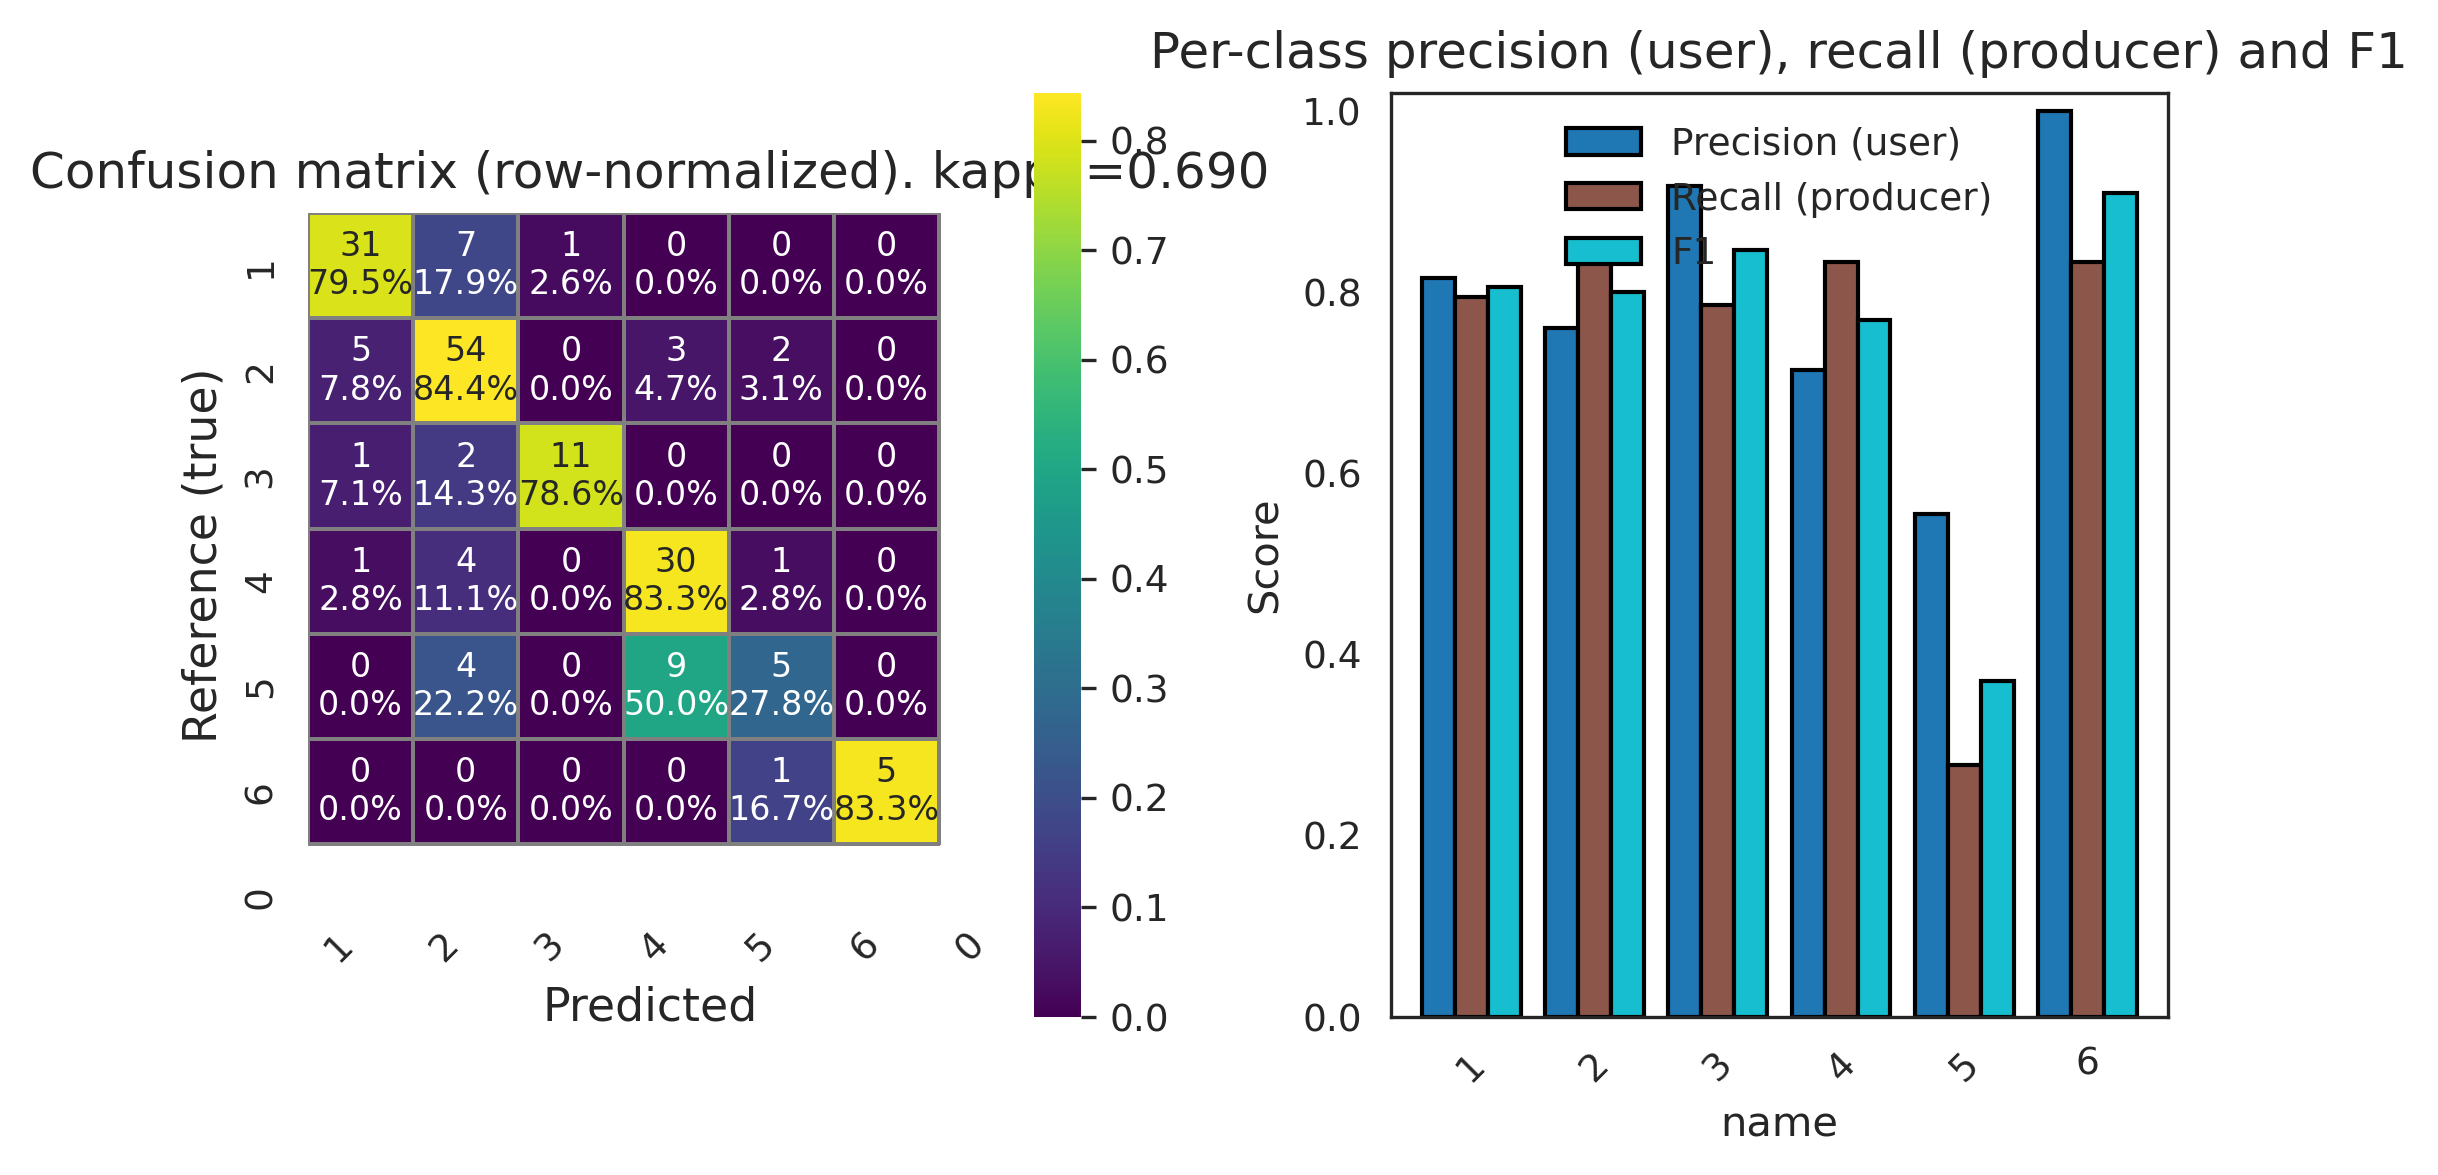

Saved: eval_publication_confmat.png
Saved: eval_publication_confmat.svg
Saved: eval_publication_confmat.pdf


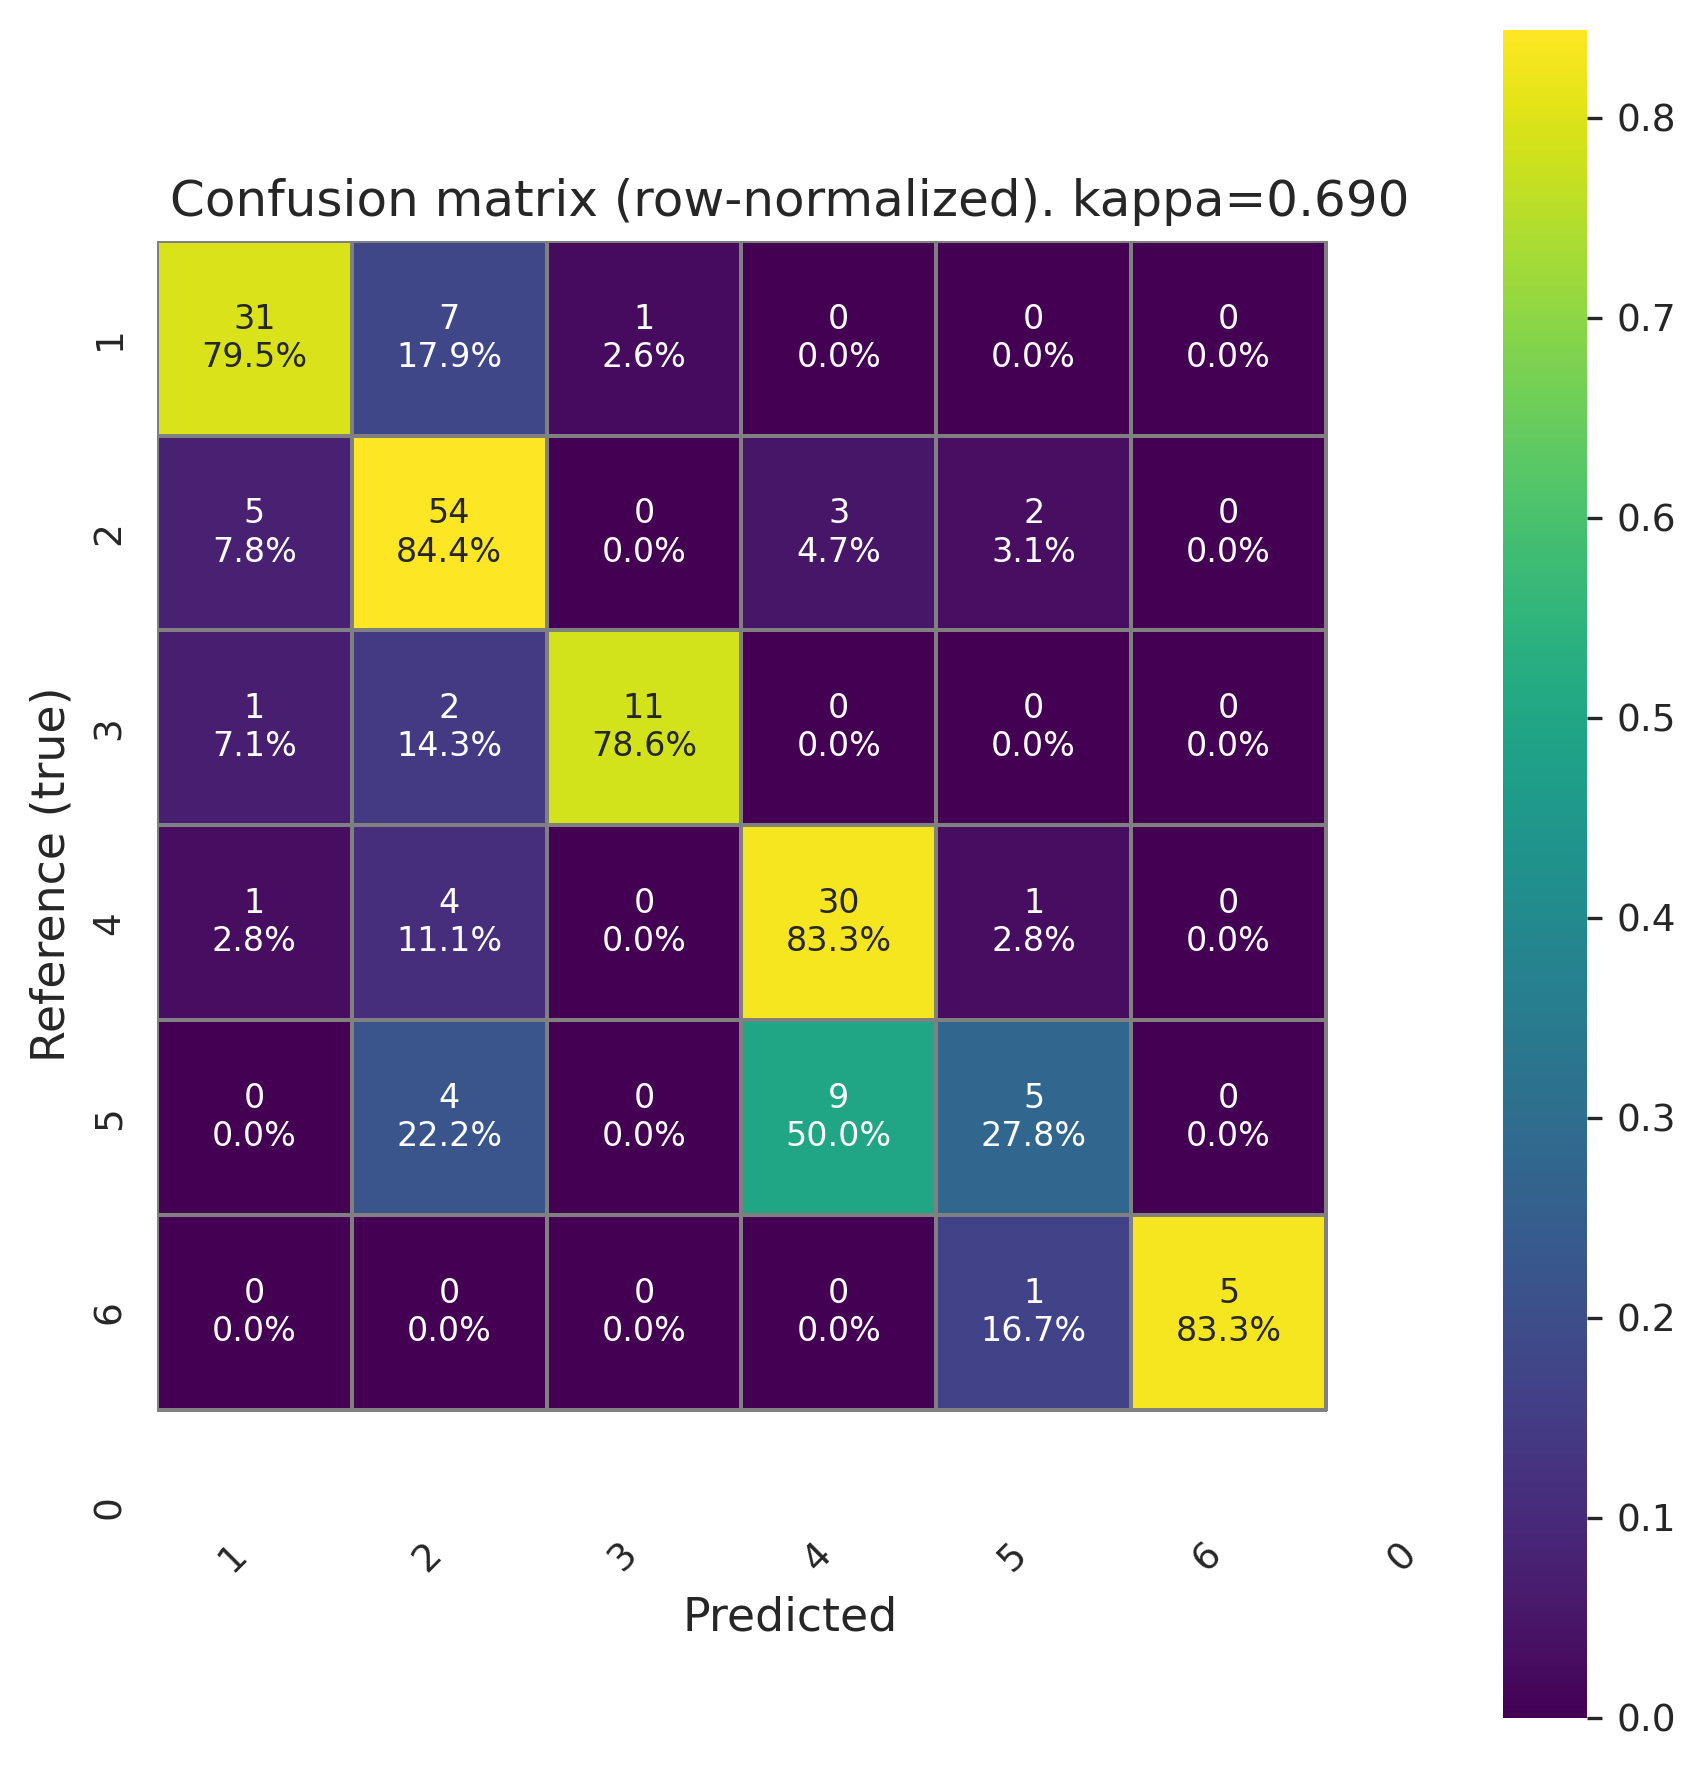

In [63]:
# Publication-quality confusion matrix + accuracy summary
# Paste after test_actual and test_predicted have been defined (arrays of same length)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support,
    accuracy_score,
    cohen_kappa_score
)

# ---------- Configuration ----------
# Visual style settings (adjust for journal)
sns.set_style("white")
rcParams.update({
    "font.size": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # "font.family": "serif",            # enable if Times/serif available
    # "font.serif": ["Times New Roman"]
})

path = "figures/"


# Choose colormap: "magma","viridis","cividis","rocket" (colorblind-friendly options)
cm_cmap = "viridis"

# Output sizes (inches). Typical journal widths:
# single-column ~ 3.3 in (85mm), double-column ~ 7.0 in (178mm)
figure_width_inches = 8.0   # set to 3.35 for single-column figure
figure_height_inches = 4.0
dpi = 300
save_prefix = "eval_publication"   # files: eval_publication.png/.svg/.pdf

# If you want a different ordering of classes, set labels_order explicitly (list of numeric or encoded labels).
# Example: labels_order = [1,2,3,4,5,6]
labels_order = None   # None -> auto-detect (sorted unique)

# If you have a mapping from numeric code -> human name (from your tdata GeoDataFrame), provide it here.
# Example: code_to_name = {1:"Forest", 2:"Cropland", ...}
code_to_name = None
# If you have a LabelEncoder saved in the namespace, it will be used automatically.
label_encoder = globals().get("label_encoder", None)

# ---------- Derive label names and ordering ----------
y_true = np.asarray(test_actual)
y_pred = np.asarray(test_predicted)

if labels_order is None:
    unique_labels = np.unique(np.concatenate([y_true, y_pred]))
    labels_order = list(sorted(unique_labels))

# class tick names (human readable)
if code_to_name:
    class_names = [code_to_name.get(l, str(l)) for l in labels_order]
elif label_encoder is not None:
    # label_encoder.classes_ are strings in encoder order (0..n-1)
    # if labels_order are encoded ints 0..n-1 this maps correctly; otherwise we try to map by index
    try:
        class_names = [label_encoder.inverse_transform([l])[0] for l in labels_order]
    except Exception:
        # fallback: use classes_ but reorder to match labels_order indices
        classes = list(label_encoder.classes_)
        class_names = [classes[int(l)] if 0 <= int(l) < len(classes) else str(l) for l in labels_order]
else:
    class_names = [str(l) for l in labels_order]

# ---------- Compute metrics ----------
acc = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred, labels=labels_order)
p, r, f1, support = precision_recall_fscore_support(y_true, y_pred, labels=labels_order, zero_division=0)

df_metrics = pd.DataFrame({
    "label": labels_order,
    "name": class_names,
    "precision": p,
    "recall": r,             # producer's accuracy
    "f1": f1,
    "support": support
})
df_metrics["users_accuracy"] = df_metrics["precision"]
df_metrics["producers_accuracy"] = df_metrics["recall"]

# Save metrics for record
df_metrics.to_csv(f"{path}{save_prefix}_per_class_metrics.csv", index=False)
try:
    df_metrics.to_latex(f"{path}{save_prefix}_per_class_metrics.tex", index=False, float_format="%.3f")
except Exception:
    pass

# Print summary
print(f"Samples: {len(y_true)}    Accuracy: {acc:.4f} ({acc*100:.2f}%)    Cohen's kappa: {kappa:.4f}\n")
print("Per-class metrics (users/producer/f1/support):")
display(df_metrics.style.format({
    "precision": "{:.3f}", "recall": "{:.3f}", "f1": "{:.3f}", "support": "{:.0f}",
    "users_accuracy": "{:.3f}", "producers_accuracy": "{:.3f}"
}))

# ---------- Confusion matrix: counts + normalized by true class (producer's accuracy) ----------
cm = confusion_matrix(y_true, y_pred, labels=labels_order)
with np.errstate(all='ignore'):
    cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
cm_norm = np.nan_to_num(cm_norm)

# Build annotation matrix with "count\nxx.x%"
annot = np.empty_like(cm).astype(object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{cm_norm[i, j]*100:.1f}%"

# ---------- Plotting functions ----------
def plot_confusion_matrix(ax=None, figsize=(6,6), show_title=True, cmap=cm_cmap):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm_norm, annot=annot, fmt="", cmap=cmap, cbar=True,
                xticklabels=int_to_str_label, yticklabels=int_to_str_label,
                linewidths=0.5, linecolor='gray', square=True, ax=ax,
                annot_kws={"fontsize": 8})
    ax.set_xlabel("Predicted", fontsize=11)
    ax.set_ylabel("Reference (true)", fontsize=11)
    if show_title:
        ax.set_title(f"Confusion matrix (row-normalized). kappa={kappa:.3f}", fontsize=12)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    return ax

def plot_class_bars(ax=None, figsize=(6,4)):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    df_plot = df_metrics.set_index("name")[["precision","recall","f1"]]
    df_plot.plot(kind="bar", ax=ax, colormap="tab10", rot=45, edgecolor='black', width=0.8)
    ax.set_ylim(0, 1.02)
    ax.set_ylabel("Score")
    ax.set_title("Per-class precision (user), recall (producer) and F1")
    ax.legend(["Precision (user)","Recall (producer)","F1"], frameon=False)
    return ax

# ---------- Create and save combined figure ----------
fig = plt.figure(figsize=(figure_width_inches, figure_height_inches), dpi=dpi)
# left: confusion matrix, right: bars
gs = fig.add_gridspec(1, 2, width_ratios=[1.1, 1.0], wspace=0.28)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

plot_confusion_matrix(ax=ax0, figsize=None)
plot_class_bars(ax=ax1, figsize=None)

# final layout & save
plt.tight_layout()
for ext in ("png", "svg", "pdf"):
    out = f"{save_prefix}.{ext}"
    fig.savefig(out, dpi=dpi, bbox_inches="tight", facecolor="white")
    print("Saved:", out)
plt.show()

# ---------- Also create a single large confusion-matrix figure (useful as standalone) ----------
fig2, ax2 = plt.subplots(figsize=(6,6), dpi=dpi)
plot_confusion_matrix(ax=ax2, figsize=None, show_title=True)
fig2.tight_layout()
for ext in ("png","svg","pdf"):
    out = f"{save_prefix}_confmat.{ext}"
    fig2.savefig(out, dpi=dpi, bbox_inches="tight", facecolor="white")
    print("Saved:", out)
plt.show()

/tmp/ipykernel_740/1328843801.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: figures/eval_publication.png
Saved: figures/eval_publication.svg
Saved: figures/eval_publication.pdf


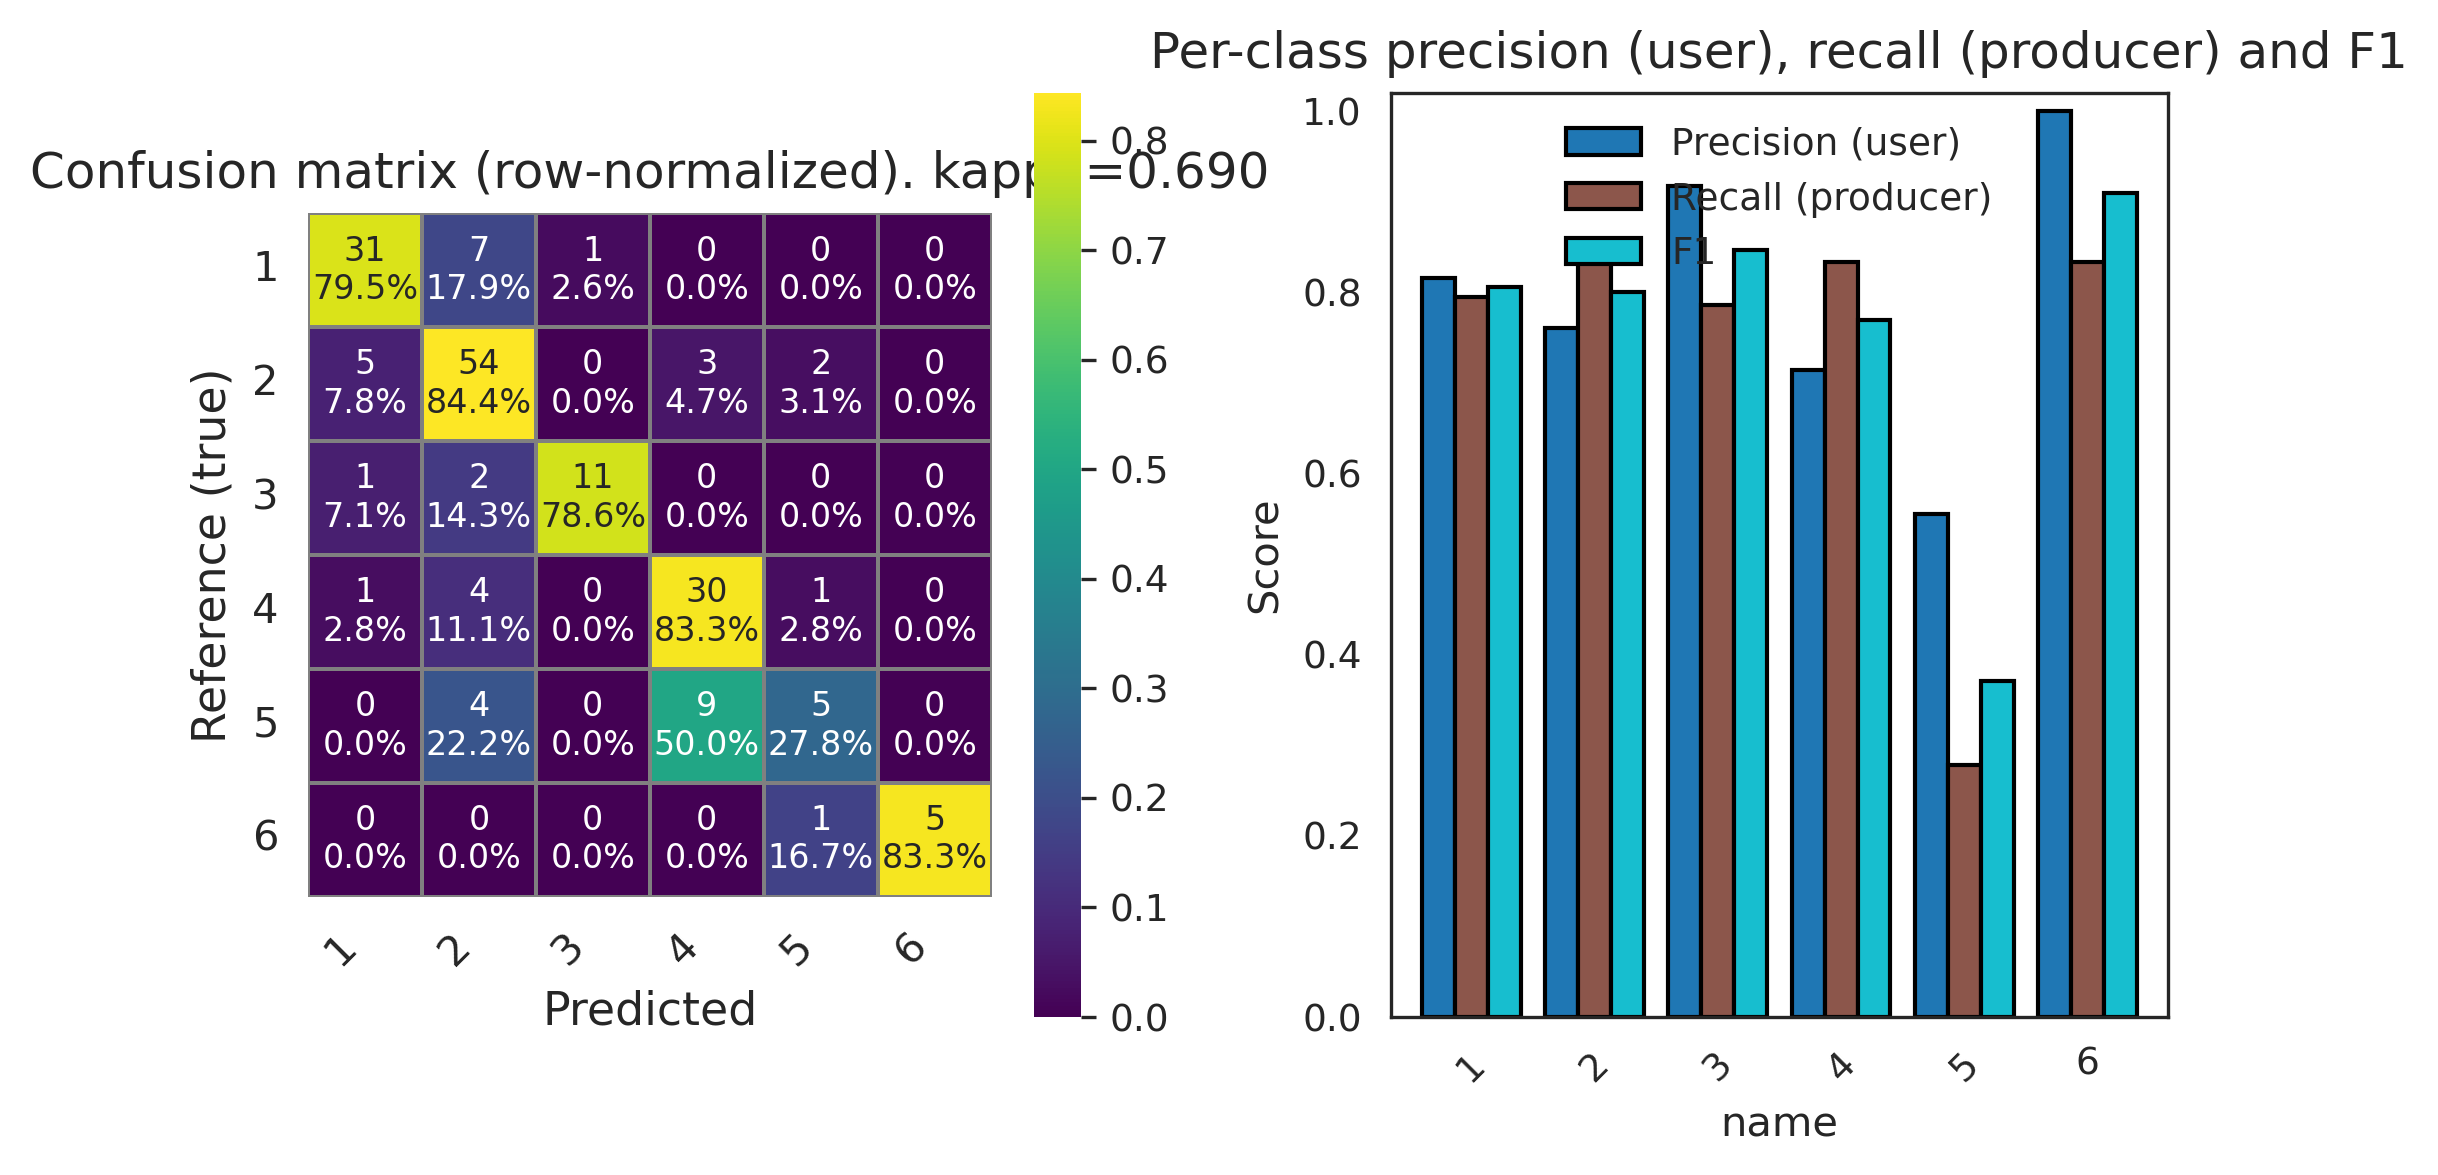

In [64]:
# --------- Prepare human-readable label names (strings) ----------
# Option 1: Use mapping from your training GeoDataFrame 'tdata' (numeric code -> string)
if 'tdata' in globals() and 'LULC_code' in tdata.columns and 'LULC_class' in tdata.columns:
    code_to_name = dict(tdata[['LULC_code','LULC_class']].drop_duplicates().values)
    label_names = [code_to_name.get(l, str(l)) for l in labels_order]

# Option 2: If you have a LabelEncoder (encoded ints -> strings)
elif 'label_encoder' in globals() and label_encoder is not None:
    try:
        label_names = [label_encoder.inverse_transform([l])[0] for l in labels_order]
    except Exception:
        # fallback: use label_encoder.classes_ in encoder order (good if labels_order == [0..n-1])
        label_names = [str(x) for x in label_encoder.classes_]

# Option 3: Provide a custom list of strings (example)
# custom_labels = ['Water','Grassland','Cropland','...','Seagrass']
# label_names = custom_labels  # ensure same length and order as labels_order

# Final fallback: use class_names computed earlier or numeric labels
if 'label_names' not in locals() and 'label_names' not in globals():
    if 'class_names' in globals() and len(class_names) == len(labels_order):
        label_names = class_names
    else:
        label_names = [str(l) for l in labels_order]

# Optionally move a class (e.g. numeric 12) to end:
desired_last = 12            # set to the numeric code of the class you want last (or None)
if desired_last is not None and desired_last in labels_order:
    if list(labels_order)[-1] != desired_last:
        # reorder labels_order and label_names so desired_last is last
        labels_order = [l for l in labels_order if l != desired_last] + [desired_last]
        # reorder label_names similarly using mapping
        name_map = dict(zip([*labels_order[:-1], desired_last], label_names if len(label_names)==len(labels_order) else label_names))
        # simpler: rebuild label_names from code_to_name or label_encoder if available:
        if 'code_to_name' in locals():
            label_names = [code_to_name.get(l, str(l)) for l in labels_order]
        elif 'label_encoder' in globals() and label_encoder is not None:
            try:
                label_names = [label_encoder.inverse_transform([l])[0] for l in labels_order]
            except Exception:
                label_names = [str(l) for l in labels_order]
        else:
            label_names = [str(l) for l in labels_order]

# Wrap long labels to multiple lines for neat display (max width 18 chars)
import textwrap
max_label_chars = 18
label_names_wrapped = ["\n".join(textwrap.wrap(s, max_label_chars)) for s in label_names]

# Adjust font size depending on number of classes
n_classes = len(label_names_wrapped)
xtick_fontsize = 10 if n_classes <= 10 else max(6, int(10 - (n_classes-10)/2))

# --------- Replace plotting functions to use label_names_wrapped ----------
def plot_confusion_matrix(ax=None, figsize=(6,6), show_title=True, cmap=cm_cmap):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm_norm, annot=annot, fmt="", cmap=cmap, cbar=True,
                xticklabels=label_names_wrapped, yticklabels=label_names_wrapped,
                linewidths=0.5, linecolor='gray', square=True, ax=ax,
                annot_kws={"fontsize": 8})
    ax.set_xlabel("Predicted", fontsize=11)
    ax.set_ylabel("Reference (true)", fontsize=11)
    if show_title:
        ax.set_title(f"Confusion matrix (row-normalized). kappa={kappa:.3f}", fontsize=12)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=xtick_fontsize)
    plt.setp(ax.get_yticklabels(), rotation=0, va="center", fontsize=xtick_fontsize)
    return ax

def plot_class_bars(ax=None, figsize=(6,4)):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    df_plot = df_metrics.set_index("name")[["precision","recall","f1"]]
    df_plot.plot(kind="bar", ax=ax, colormap="tab10", rot=45, edgecolor='black', width=0.8)
    ax.set_ylim(0, 1.02)
    ax.set_ylabel("Score")
    ax.set_title("Per-class precision (user), recall (producer) and F1")
    ax.legend(["Precision (user)","Recall (producer)","F1"], frameon=False)
    return ax

# --------- Create and save combined figure (uses label_names_wrapped automatically) ----------
fig = plt.figure(figsize=(figure_width_inches, figure_height_inches), dpi=dpi)
gs = fig.add_gridspec(1, 2, width_ratios=[1.1, 1.0], wspace=0.28)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

plot_confusion_matrix(ax=ax0, figsize=None)
plot_class_bars(ax=ax1, figsize=None)

plt.tight_layout()
import os
os.makedirs(path, exist_ok=True)
for ext in ("png", "svg", "pdf"):
    out = f"{path}{save_prefix}.{ext}"
    fig.savefig(out, dpi=dpi, bbox_inches="tight", facecolor="white")
    print("Saved:", out)
plt.show()


/tmp/ipykernel_740/4038277119.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: figures/eval_publication.png
Saved: figures/eval_publication.svg
Saved: figures/eval_publication.pdf


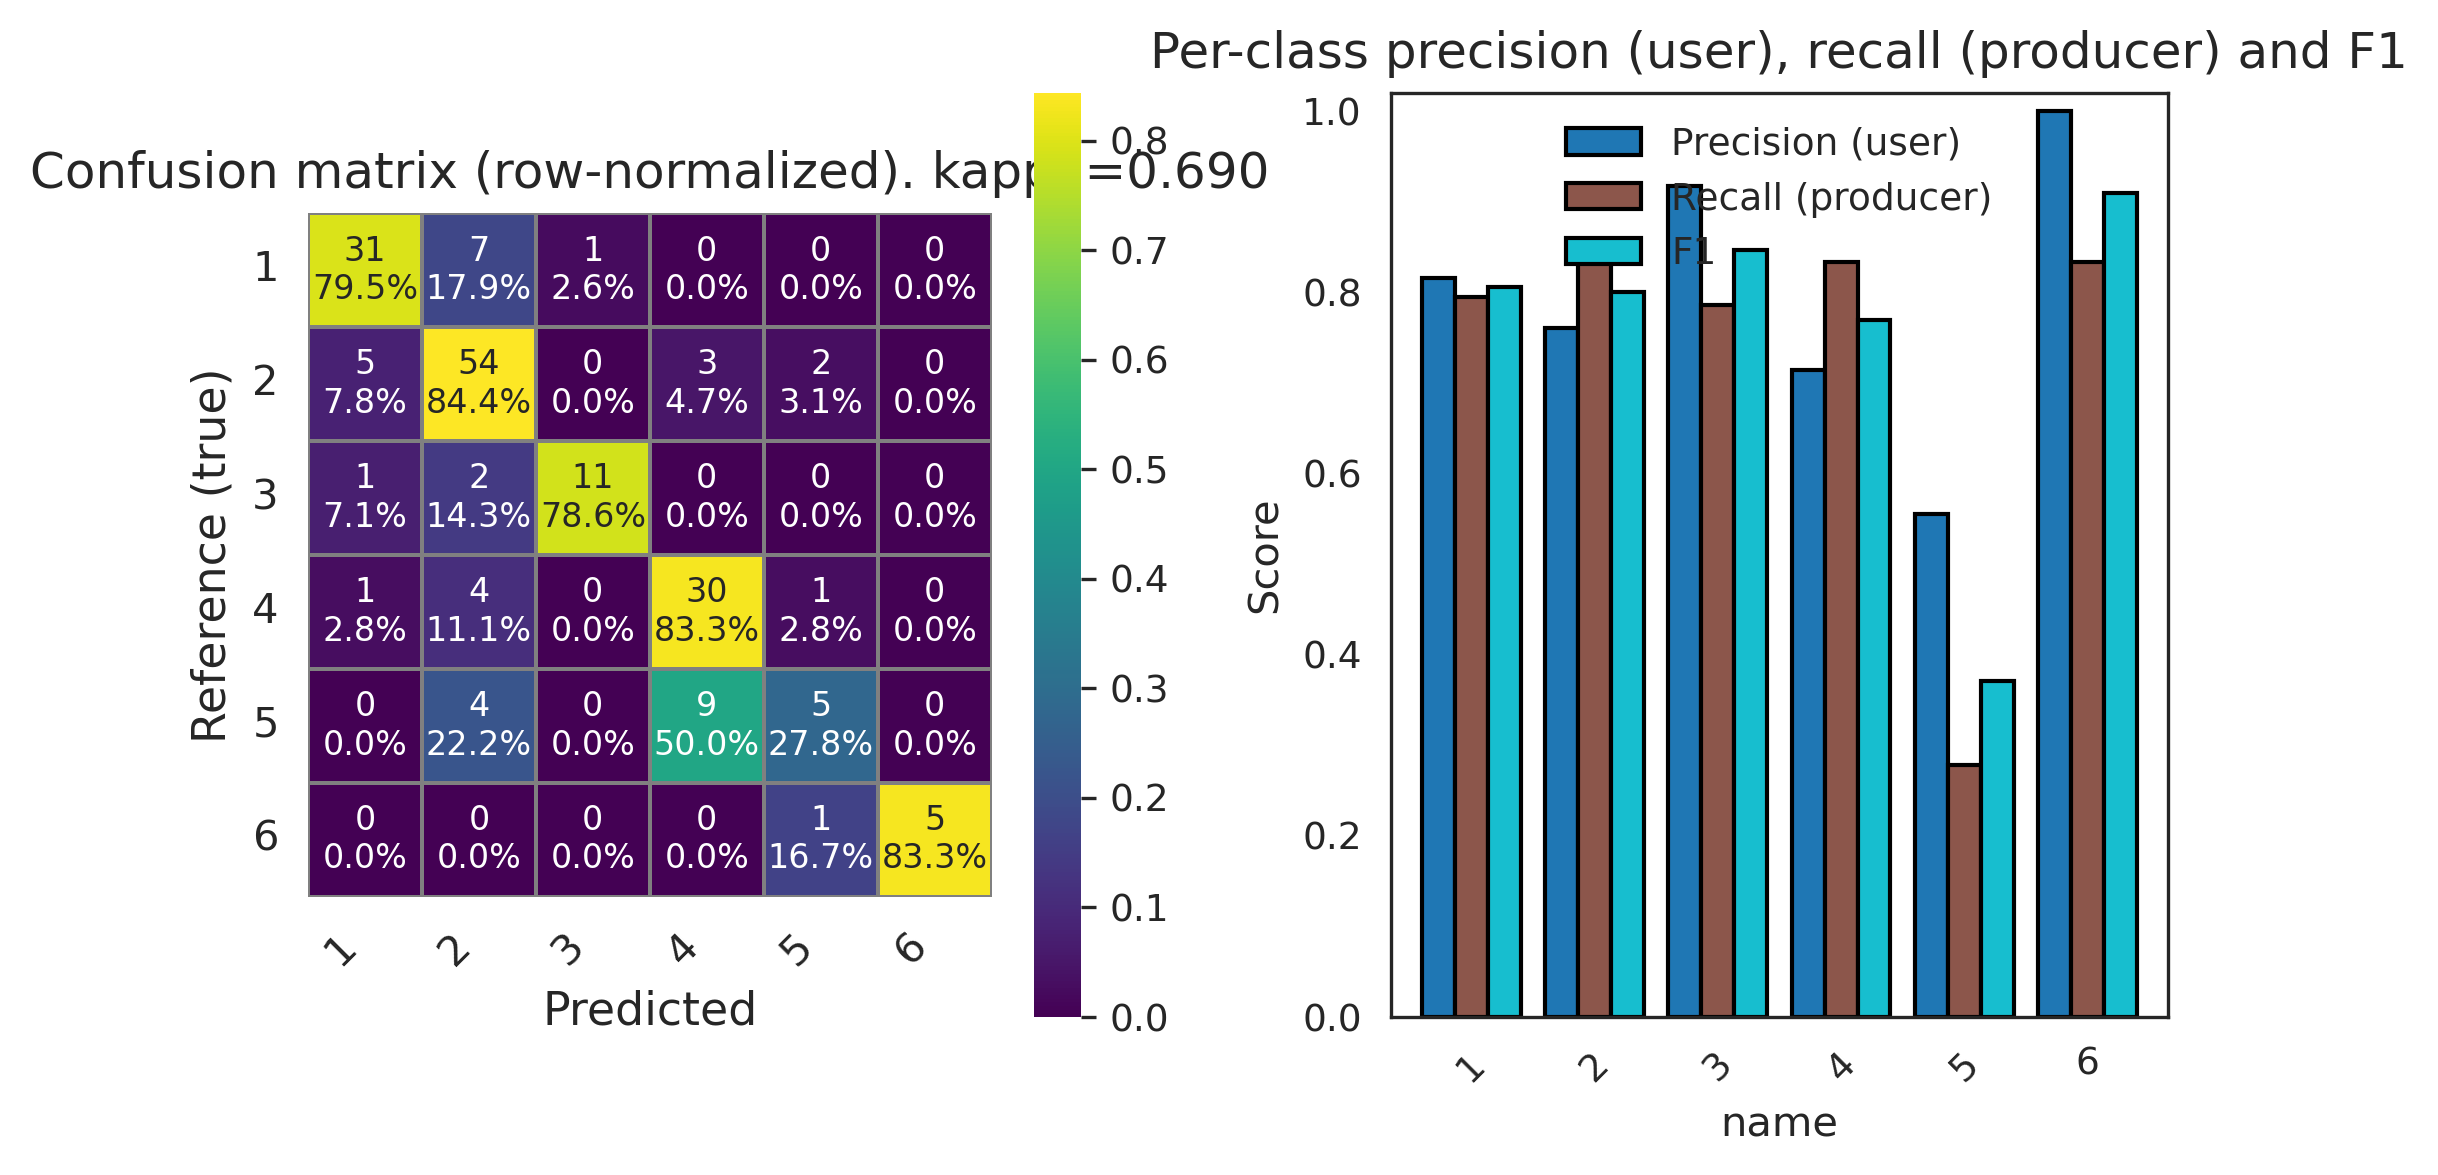

/tmp/ipykernel_740/1328843801.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: figures/eval_publication.png
Saved: figures/eval_publication.svg
Saved: figures/eval_publication.pdf


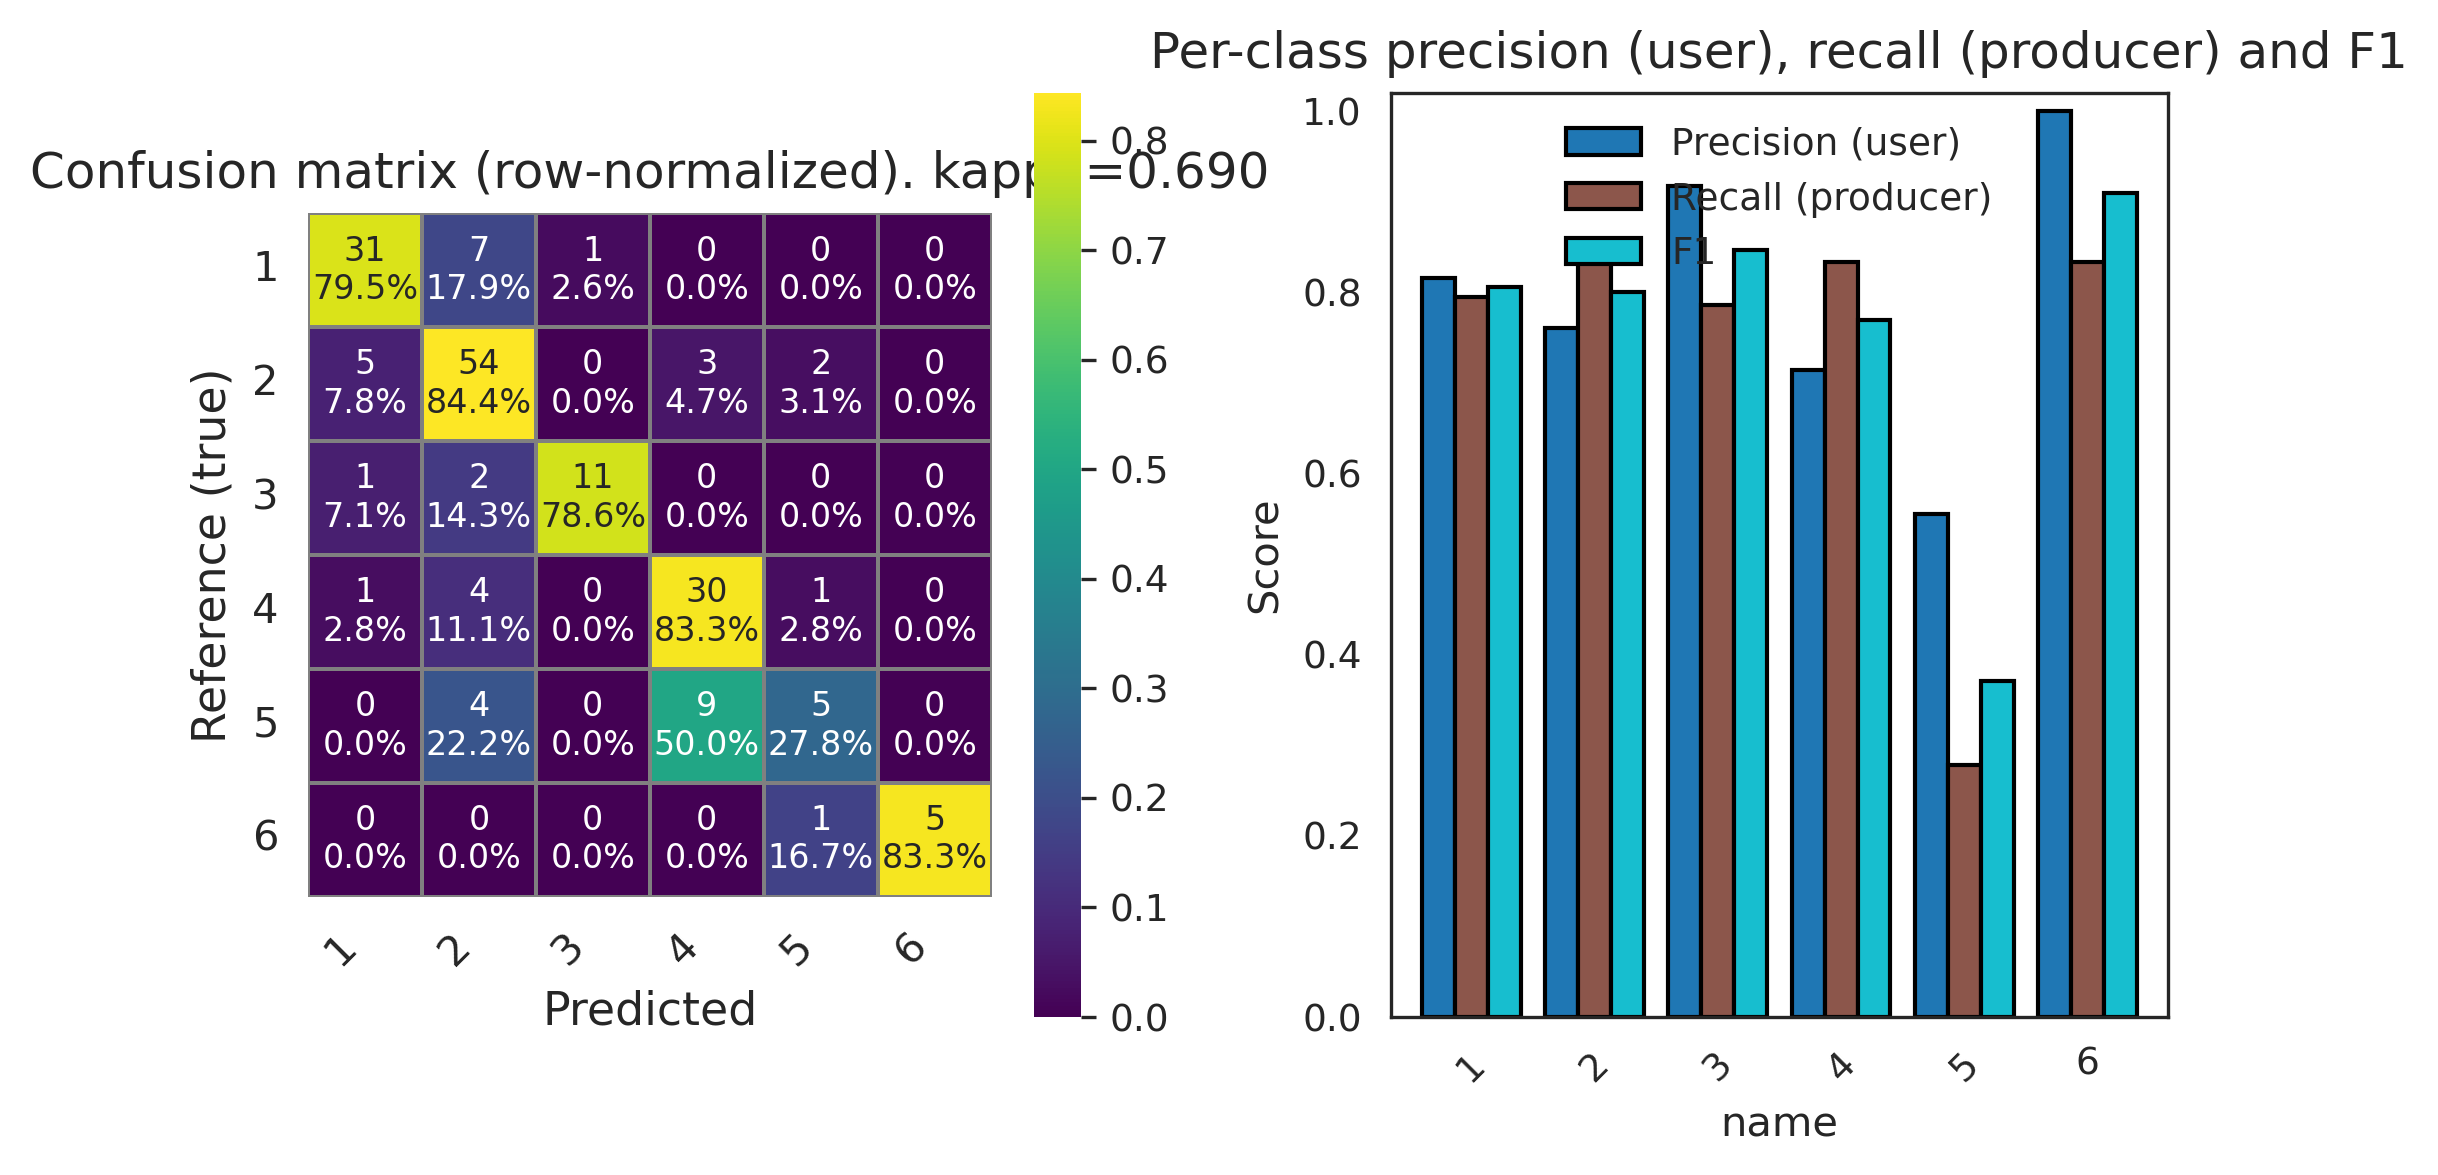

In [62]:
# --------- Prepare human-readable label names (strings) ----------
# Option 1: Use mapping from your training GeoDataFrame 'tdata' (numeric code -> string)
if 'tdata' in globals() and 'LULC_code' in tdata.columns and 'LULC_class' in tdata.columns:
    code_to_name = dict(tdata[['LULC_code','LULC_class']].drop_duplicates().values)
    label_names = [code_to_name.get(l, str(l)) for l in labels_order]

# Option 2: If you have a LabelEncoder (encoded ints -> strings)
elif 'label_encoder' in globals() and label_encoder is not None:
    try:
        label_names = [label_encoder.inverse_transform([l])[0] for l in labels_order]
    except Exception:
        # fallback: use label_encoder.classes_ in encoder order (good if labels_order == [0..n-1])
        label_names = [str(x) for x in label_encoder.classes_]

# Option 3: Provide a custom list of strings (example)
# custom_labels = ['Water','Grassland','Cropland','...','Seagrass']
# label_names = custom_labels  # ensure same length and order as labels_order

# Final fallback: use class_names computed earlier or numeric labels
if 'label_names' not in locals() and 'label_names' not in globals():
    if 'class_names' in globals() and len(class_names) == len(labels_order):
        label_names = class_names
    else:
        label_names = [str(l) for l in labels_order]

# Optionally move a class (e.g. numeric 12) to end:
desired_last = 12            # set to the numeric code of the class you want last (or None)
if desired_last is not None and desired_last in labels_order:
    if list(labels_order)[-1] != desired_last:
        # reorder labels_order and label_names so desired_last is last
        labels_order = [l for l in labels_order if l != desired_last] + [desired_last]
        # reorder label_names similarly using mapping
        name_map = dict(zip([*labels_order[:-1], desired_last], label_names if len(label_names)==len(labels_order) else label_names))
        # simpler: rebuild label_names from code_to_name or label_encoder if available:
        if 'code_to_name' in locals():
            label_names = [code_to_name.get(l, str(l)) for l in labels_order]
        elif 'label_encoder' in globals() and label_encoder is not None:
            try:
                label_names = [label_encoder.inverse_transform([l])[0] for l in labels_order]
            except Exception:
                label_names = [str(l) for l in labels_order]
        else:
            label_names = [str(l) for l in labels_order]

# Wrap long labels to multiple lines for neat display (max width 18 chars)
import textwrap
max_label_chars = 18
label_names_wrapped = ["\n".join(textwrap.wrap(s, max_label_chars)) for s in label_names]

# Adjust font size depending on number of classes
n_classes = len(label_names_wrapped)
xtick_fontsize = 10 if n_classes <= 10 else max(6, int(10 - (n_classes-10)/2))

# --------- Replace plotting functions to use label_names_wrapped ----------
def plot_confusion_matrix(ax=None, figsize=(6,6), show_title=True, cmap=cm_cmap):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm_norm, annot=annot, fmt="", cmap=cmap, cbar=True,
                xticklabels=label_names_wrapped, yticklabels=label_names_wrapped,
                linewidths=0.5, linecolor='gray', square=True, ax=ax,
                annot_kws={"fontsize": 8})
    ax.set_xlabel("Predicted", fontsize=11)
    ax.set_ylabel("Reference (true)", fontsize=11)
    if show_title:
        ax.set_title(f"Confusion matrix (row-normalized). kappa={kappa:.3f}", fontsize=12)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=xtick_fontsize)
    plt.setp(ax.get_yticklabels(), rotation=0, va="center", fontsize=xtick_fontsize)
    return ax

def plot_class_bars(ax=None, figsize=(6,4)):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    df_plot = df_metrics.set_index("name")[["precision","recall","f1"]]
    df_plot.plot(kind="bar", ax=ax, colormap="tab10", rot=45, edgecolor='black', width=0.8)
    ax.set_ylim(0, 1.02)
    ax.set_ylabel("Score")
    ax.set_title("Per-class precision (user), recall (producer) and F1")
    ax.legend(["Precision (user)","Recall (producer)","F1"], frameon=False)
    return ax

# --------- Create and save combined figure (uses label_names_wrapped automatically) ----------
fig = plt.figure(figsize=(figure_width_inches, figure_height_inches), dpi=dpi)
gs = fig.add_gridspec(1, 2, width_ratios=[1.1, 1.0], wspace=0.28)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

plot_confusion_matrix(ax=ax0, figsize=None)
plot_class_bars(ax=ax1, figsize=None)

plt.tight_layout()
import os
os.makedirs(path, exist_ok=True)
for ext in ("png", "svg", "pdf"):
    out = f"{path}{save_prefix}.{ext}"
    fig.savefig(out, dpi=dpi, bbox_inches="tight", facecolor="white")
    print("Saved:", out)
plt.show()
